# 1)Veri dataframe çevrilmesi ve incelenmesi

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing #veri normalisazyonu
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.neighbors import KNeighborsClassifier  #KNneighbors algoritması
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import classification_report

In [11]:
df = pd.read_csv("data/deposit.csv")

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


In [13]:
df.head()
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

# 2)Isı haritasına bakılarak birbirine %70 üzeri bağımlı olan değişkenler var ise, değişken indergemesi yapılması

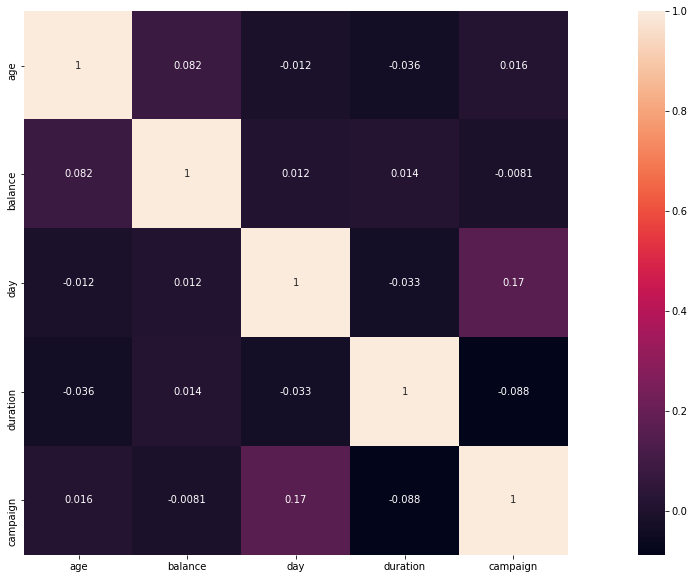

In [14]:
korelasyon = df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(korelasyon,vmax=1,square=True,annot=True)
plt.show()

# 2-)one-hat dönüşümü 

* **Çok kategorili değişkenleri one-hat dönüşümü ile değişkenlerin standardizasyonu yapıldı**

In [15]:
df = pd.get_dummies(df.loc[:,('age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y')])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  40000 non-null  int64
 1   balance              40000 non-null  int64
 2   day                  40000 non-null  int64
 3   duration             40000 non-null  int64
 4   campaign             40000 non-null  int64
 5   job_admin            40000 non-null  uint8
 6   job_blue-collar      40000 non-null  uint8
 7   job_entrepreneur     40000 non-null  uint8
 8   job_housemaid        40000 non-null  uint8
 9   job_management       40000 non-null  uint8
 10  job_retired          40000 non-null  uint8
 11  job_self-employed    40000 non-null  uint8
 12  job_services         40000 non-null  uint8
 13  job_student          40000 non-null  uint8
 14  job_technician       40000 non-null  uint8
 15  job_unemployed       40000 non-null  uint8
 16  job_unknown          4

# 3)Veri Normalisazyonu
* VERİ SETİNDE BULUNAN BİLGİYİ ÖZÜTÜNÜ(VARYASINI ORTALAMASINI) BOZMADAN BİLGİLERİ BELİRLİ BİR STANDARDA GETİRİR.

In [17]:
scale = preprocessing.MinMaxScaler() #0-1 arasında standartlandırıldı
data_scaled = pd.DataFrame(scale.fit_transform(df), columns = df.columns) 

# 4) Baskılama yöntemi kullanılarak aykırı gözlemleri giderebilmek
* LOCAL OUTLİER FACTOR kütüphanesi kullanılarak baskılama yapılacaktır.

In [18]:
from sklearn.neighbors import LocalOutlierFactor as lof

In [19]:
clf = lof(n_neighbors= 20, contamination = 0.1) # ilk parametre komşu sayısı ikinci parametre yogunluk 

In [20]:
clf.fit_predict(data_scaled) # veri normalisazyonunda yapılan y_yes barındıran dataframe !!
# oluşturulan skorlar array olarak tutulur. negatif değerler yoğunlugun dusuk oldugu yanı aykırı gözleme yakın olduğu anlamındadır.

array([ 1,  1,  1, ...,  1,  1, -1])

In [21]:
df_skor = clf.negative_outlier_factor_
df_skor

array([-1.06308503, -1.15007158, -2.94180866, ..., -1.0271531 ,
       -2.99412919, -6.06622884])

In [22]:
np.sort(df_skor)[0:20]

array([-24.98251809, -24.38022541, -21.18999912, -20.99609986,
       -20.995646  , -20.1492951 , -19.89416182, -18.9973389 ,
       -18.97991511, -18.69511368, -18.65643325, -18.6499501 ,
       -18.42840886, -18.2761487 , -17.83320005, -17.81795956,
       -17.72205984, -17.56820756, -17.41596729, -17.38369991])

In [23]:
esik_deger = np.sort(df_skor)[14]
esik_deger

-17.833200052243164

In [24]:
df_skor < esik_deger #aykırı gözlemler.

array([False, False, False, ..., False, False, False])

In [25]:
df_skor > esik_deger #aykırı olmayan gözlemler.

array([ True,  True,  True, ...,  True,  True,  True])

In [26]:
aykiri_ob = data_scaled[df_skor < esik_deger]
aykiri_ob   #aykırı gözlemler.

,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y_no,y_yes
19754,0.157895,0.073139,0.233333,0.014843,0.016129,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20136,0.144737,0.141013,0.333333,0.054697,0.016129,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20302,0.197368,0.084361,0.333333,0.018910,0.016129,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21458,0.184211,0.072758,0.566667,0.025824,0.048387,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22048,0.157895,0.079558,0.633333,0.025214,0.032258,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22104,0.157895,0.073021,0.666667,0.050020,0.016129,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22511,0.144737,0.077007,0.700000,0.076047,0.048387,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24067,0.157895,0.140205,0.666667,0.010980,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
24200,0.210526,0.073657,0.533333,0.021960,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
25560,0.223684,0.068400,0.600000,0.056527,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


* **baskılama yöntemi**

In [27]:
atama = df[df_skor == esik_deger]
atama

,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y_no,y_yes
26037,39,548,19,154,2,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [28]:
# index hatası almamak için index almadan çalışılır.
res = aykiri_ob.to_records(index = False )
res[:] = atama.to_records(index = False)

In [29]:
data_scaled[aykiri_tf] = pd.DataFrame( res, index = aykirilar.index)

NameError: name 'aykirilar' is not defined

In [ ]:
data_scaled[esik_deger>df_skor] # görüldüğü üzere aykırı gözlemler esik degere baskılandı.

In [30]:
data_scaled

,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y_no,y_yes
0,0.513158,0.092259,0.133333,0.053070,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.328947,0.073067,0.133333,0.030704,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.184211,0.072822,0.133333,0.015453,0.000000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.368421,0.086476,0.133333,0.018707,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.184211,0.072812,0.133333,0.040260,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.447368,0.076390,0.066667,0.021757,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
39996,0.144737,0.103127,0.066667,0.048394,0.032258,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
39997,0.460526,0.074619,0.066667,0.034567,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
39998,0.197368,0.082309,0.066667,0.069540,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# 5)Test Setlerinin Oluşturulması

In [31]:
y = data_scaled['y_yes']  
data_scale = data_scaled.drop(['y_yes','y_no'],axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data_scale, y, test_size = 0.30, random_state = 42)

# 6) K-En Yakın Komşu (K-Nearest Neighbors) Model oluşturma

* **Gözlemlerin birbirilerine olan yakınlıklarına göre tahmin yapan algoritma.**

In [49]:
knn_model = KNeighborsClassifier()
kn_neighbors = {"n_neighbors": np.arange(1,30,1)}

In [ ]:
kn_neighbors = {"n_neighbors": np.arange(1,30,1)}
kn_model_cv = GridSearchCV(kn_model, kn_neighbors, cv = 10).fit(X_train, y_train)
knn_model_cv.best_params_

In [81]:
knn_tuned = KNeighborsClassifier(n_neighbors= 100).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
print('Doğruluk oranı:',accuracy_score(y_test, y_pred))  #doğruluk oranı

Doğruluk oranı: 0.9273333333333333


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     11128
         1.0       0.00      0.00      0.00       872

    accuracy                           0.93     12000
   macro avg       0.46      0.50      0.48     12000
weighted avg       0.86      0.93      0.89     12000



C:\Users\erayc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)

In [73]:
print('MSE:',mse) #hata ortalama kare 
print('RMSE:',rmse) #hata ortalama karesinin karekökü 

MSE: 0.07266666666666667
RMSE: 0.2695675549220764


* **Cross Validation ile farklı test verilerindeki performansına bakıldığında.**

In [87]:
c_mean= np.mean(cross_val_score(knn_model, X_train, y_train, cv=5))*100
print('Ortalama Doğruluk performansı:',c_mean)
c_std = np.std(cross_val_score(knn_model, X_train, y_train, cv=5))*100
print('Doğruluk Skoru Standart Sapması:',c_std)

Ortalama Doğruluk performansı: 92.74642857142857
Doğruluk Skoru Standart Sapması: 0.136183399749557


### SONUÇ ### 

* **Veri setindeki değişkenlerin ısı haritasına bakıldı ancak %70 üzeri bağımlı değişken görülmediği için indirgenme yapılmadı.**
* **Veriler One-Hat döüşümü uygulanarak çok kategorili değişkenlerin standartdizasyon işlemi gerçekleştirildi.**
* **Veriler 0-1 arasında bir normalisazyon işlemne tabi tutuldu.**
* **Aykırı olan gözlemlerin giderilmesi için aşağı baskılama yöntemi(Downsampling) ve LOCAL OUTLİER FACTOR kütüphanesi kullanıldı. Komşu yoğunluğu 20, yoğunluk ise 0.1 olarak  seçildi.**
* **KNeighbors ML algoritması kullanıldı. 'n_neighbors' parametresi Grid_Searcg_CV kütüphanesi kullanılarak bulundu.**
* **Modelin doğruluk oranı %92 olarak bulundu.**
* **Hata ortalama kareler toplamı(MSE) = 0.072, Hata ortalama kareler toplamının karekökü(RMSE) = 0.269 hataları bulundu.**
* **Model farklı  veri setleri ile test edilerek performansına bakıldı.Ortalama Doğruluk Performansı =%92, Doğruluk Skoru Standart Sapması = %0.13 olarak bulundu.**